In [78]:
#%pip install geopandas
#%pip install geodatasets
#%pip install geopy
#%pip install contextily

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from geodatasets import get_path
from geopy.geocoders import Nominatim
from shapely.geometry import Point
import contextily as ctx

In [60]:
# Load shape file
#map = gpd.read_file('Resources\Zillow_Regions.csv')

In [61]:
zip_data = pd.read_csv('Resources/zip_regions.csv')
zip_df = pd.DataFrame(zip_data)
zip_df.head()

,region_id,region_type,zipcode,state,state_region,city,county
0,78144,zip,46411,IN,Chicago-Naperville-Elgin,Whiting,Lake County
1,84392,zip,60141,IL,Chicago-Naperville-Elgin,Broadview,Cook County
2,84630,zip,60629,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Cook County
3,84620,zip,60618,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Cook County
4,84639,zip,60639,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Cook County


In [62]:
geolocator = Nominatim(user_agent="my_geocoder")
zip_codes = zip_df['zipcode']
zip_codes

0      46411
1      60141
2      60629
3      60618
4      60639
       ...  
385    60606
386    60301
387    60602
388    60603
389    60604
Name: zipcode, Length: 390, dtype: int64

In [63]:
#location = geolocator.geocode(zip_codes)
latitudes = []
longitudes = []

for zip_code in zip_codes:
    location = geolocator.geocode(zip_code)
    latitudes.append(location.latitude)
    longitudes.append(location.longitude)

#for zip_code, lat, lon in zip(zip_codes, latitudes, longitudes):


# location = geolocator.geocode(60614)
# latitude = location.latitude
# longitude = location.longitude
# print(latitude)
longitudes

[17.9928248,
 3.026438298066763,
 -87.71207745929978,
 -87.7009897231365,
 -87.75473667550676,
 -87.69874763983117,
 -83.0513113,
 -87.70409762602564,
 -87.55542840405019,
 -87.66660369253968,
 -87.7001303165554,
 -87.71815967100792,
 -87.80433458243954,
 -87.86268510650001,
 -87.65553936035806,
 -87.33366728560277,
 -87.6512681323929,
 2.9470319433591543,
 26.66702519171975,
 2.1568449179424265,
 112.73199388333333,
 -85.019484,
 26.64697982173913,
 -82.94764655,
 -87.86895951004367,
 23.2832449,
 26.325470779411766,
 23.896381273148148,
 26.060343,
 -87.87186519737187,
 -87.8289427701087,
 23.8588231852459,
 8.67200380564524,
 -87.60674788486591,
 23.126238213333334,
 -1.8712405,
 -87.50903023828126,
 -84.7305676,
 -87.73384564677872,
 -88.18716764682081,
 -87.47007140480768,
 13.319782410416295,
 -87.9774493862745,
 -87.49784548681671,
 -87.85764257727273,
 -87.54668994221772,
 2.4079502309995684,
 13.614060810764482,
 26.810306770833336,
 -87.83535222057144,
 -88.44607197411167,
 -

In [64]:
zip_df['latitude'] = latitudes
zip_df['longitude'] = longitudes
zip_df.head()

,region_id,region_type,zipcode,state,state_region,city,county,latitude,longitude
0,78144,zip,46411,IN,Chicago-Naperville-Elgin,Whiting,Lake County,49.790115,17.992825
1,84392,zip,60141,IL,Chicago-Naperville-Elgin,Broadview,Cook County,49.199979,3.026438
2,84630,zip,60629,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Cook County,41.781218,-87.712077
3,84620,zip,60618,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Cook County,41.945212,-87.700990
4,84639,zip,60639,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Cook County,41.919299,-87.754737


In [75]:
chicago_df = pd.read_csv('Resources/chicago_df.csv')
chicago_zip_values = chicago_df[chicago_df['region_type'] == 'zip']
chicago_zip_values

,Unnamed: 0,indicator_id,region_id,date,value,indicator,category,region_type,region
718,29962,ZALL,84364,1/31/1996,140370.0,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values,zip,"60110;IL;Chicago-Naperville-Elgin, IL-IN-WI;Ca..."
719,29963,ZALL,84364,2/29/1996,140010.0,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values,zip,"60110;IL;Chicago-Naperville-Elgin, IL-IN-WI;Ca..."
720,29964,ZALL,84364,3/31/1996,139795.0,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values,zip,"60110;IL;Chicago-Naperville-Elgin, IL-IN-WI;Ca..."
721,29965,ZALL,84364,4/30/1996,139298.0,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values,zip,"60110;IL;Chicago-Naperville-Elgin, IL-IN-WI;Ca..."
722,29966,ZALL,84364,5/31/1996,138923.0,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values,zip,"60110;IL;Chicago-Naperville-Elgin, IL-IN-WI;Ca..."
...,...,...,...,...,...,...,...,...,...
5309,211525,ZALL,84419,8/31/1999,224262.0,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values,zip,"60173;IL;Chicago-Naperville-Elgin, IL-IN-WI;Sc..."
5310,211526,ZALL,84419,9/30/1999,225106.0,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values,zip,"60173;IL;Chicago-Naperville-Elgin, IL-IN-WI;Sc..."
5311,211527,ZALL,84419,10/31/1999,225726.0,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values,zip,"60173;IL;Chicago-Naperville-Elgin, IL-IN-WI;Sc..."
5312,211528,ZALL,84419,11/30/1999,226749.0,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values,zip,"60173;IL;Chicago-Naperville-Elgin, IL-IN-WI;Sc..."


In [66]:
chicago_zip_values.columns

Index(['Unnamed: 0', 'indicator_id', 'region_id', 'date', 'value', 'indicator',
       'category', 'region_type', 'region'],
      dtype='object')

In [67]:
chicago_zip_values = chicago_zip_values.groupby('region_id')['value'].mean()
chicago_zip_values = pd.DataFrame(chicago_zip_values)
chicago_zip_values

,value
region_id,
78083,129531.489796
78084,172920.416667
78088,165000.520833
78089,52559.812500
78090,104733.687500
...,...
399602,220536.104167
399605,119333.916667
399606,170570.375000


In [74]:
merged_zip_values = pd.merge(chicago_zip_values,zip_df, on='region_id', how='left')
merged_zip_values

,region_id,value,region_type,zipcode,state,state_region,city,county,latitude,longitude
0,78083,129531.489796,zip,46303,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Cedar Lake,Lake County,41.378188,-87.446784
1,78084,172920.416667,zip,46304,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Chesterton,Porter County,58.955527,26.259713
2,78088,165000.520833,zip,46311,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Dyer,Lake County,58.925906,26.325362
3,78089,52559.812500,zip,46312,IN,"Chicago-Naperville-Elgin, IL-IN-WI",East Chicago,Lake County,50.903589,18.613479
4,78090,104733.687500,zip,46319,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Griffith,Lake County,58.970704,26.325471
...,...,...,...,...,...,...,...,...,...,...
93,399602,220536.104167,zip,60124,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Elgin,Kane County,-7.233029,112.773734
94,399605,119333.916667,zip,60403,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Crest Hill,Will County,10.058040,-84.730568
95,399606,170570.375000,zip,60404,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Shorewood,Will County,58.480895,27.160993
96,399607,202145.916667,zip,60487,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Tinley Park,Cook County,50.128290,8.645709


In [81]:
gdf = gpd.GeoDataFrame(merged_zip_values)
gdf

,region_id,value,region_type,zipcode,state,state_region,city,county,latitude,longitude
0,78083,129531.489796,zip,46303,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Cedar Lake,Lake County,41.378188,-87.446784
1,78084,172920.416667,zip,46304,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Chesterton,Porter County,58.955527,26.259713
2,78088,165000.520833,zip,46311,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Dyer,Lake County,58.925906,26.325362
3,78089,52559.812500,zip,46312,IN,"Chicago-Naperville-Elgin, IL-IN-WI",East Chicago,Lake County,50.903589,18.613479
4,78090,104733.687500,zip,46319,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Griffith,Lake County,58.970704,26.325471
...,...,...,...,...,...,...,...,...,...,...
93,399602,220536.104167,zip,60124,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Elgin,Kane County,-7.233029,112.773734
94,399605,119333.916667,zip,60403,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Crest Hill,Will County,10.058040,-84.730568
95,399606,170570.375000,zip,60404,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Shorewood,Will County,58.480895,27.160993
96,399607,202145.916667,zip,60487,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Tinley Park,Cook County,50.128290,8.645709


In [79]:
# Create a geometry column with Point objects
geometry = [Point(lon, lat) for lon, lat in zip(merged_zip_values['longitude'], merged_zip_values['latitude'])]
gdf = gpd.GeoDataFrame(merged_zip_values, geometry=geometry)

# Plot the GeoDataFrame on a basemap
ax = gdf.to_crs(epsg=3857).plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=10)  # Add basemap using contextily

plt.show()

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

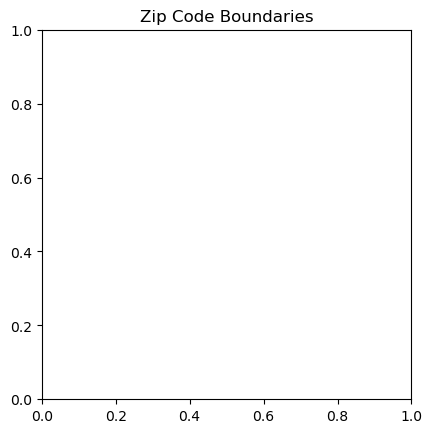

In [ ]:
zip_codes_df = gpd.read_file('Resources/zip_regions.csv')

# Plot the GeoDataFrame
zip_codes_df.plot()
plt.title('Zip Code Boundaries')
plt.show()